# Data-方法-05 感知机学习

## 1. 构造一个线性可分的数据集 

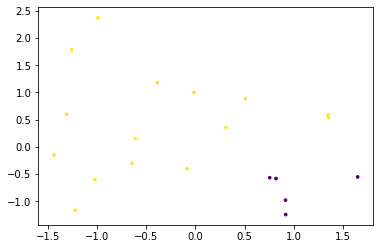

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

x,y = make_classification(n_samples=20, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, n_classes=2)

for i in range(len(x)):
    if -x[i][0]*4+x[i][1]*7+4>=0:
        y[i] = 1
    else:
        y[i] = -1
        
plt.scatter(x[:,0], x[:,1], c=y, s=7) 

## 2. 感知机的原始形式

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def preceptron_original(x, y, lr):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    y = torch.from_numpy(y).type(torch.FloatTensor)
    
    w = torch.zeros(x.size()[1]).type(torch.FloatTensor)
    b = torch.tensor(0).type(torch.FloatTensor)
    
    while True:
        flag = True
        
        for i in range(x.size()[0]):
            xi = x[i]
            yi = y[i]
            fi = F.linear(w, xi, b)
            
            if(yi*fi<=0):
                flag = False
                w = w+lr*yi*xi
                b = b+lr*yi
                break
        
        if flag:
            break
    
    return w, b

w, b = preceptron_original(x, y, 0.1)
print(w,b)

plt.scatter(x[:,0], x[:,1], c=y, s=7) 

tensor([-0.1519,  0.2645]) tensor(0.1000)


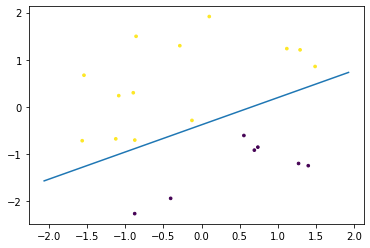

In [29]:
import numpy as np

def draw_sep(x, y, w, b):
    def lineFunction(x):
        res = -(b+w[0]*x)/w[1]
        return res
    
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    sx = np.arange(x_min, x_max, 0.1)
    
    plt.scatter(x[:,0], x[:,1], c=y, s=7) 
    plt.plot(sx, lineFunction(sx))
    plt.show()
    
    return

draw_sep(x, y, w, b)

## 3. 感知机的对偶形式

In [72]:
def preceptron_dual(x, y, lr):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    y = torch.from_numpy(y).type(torch.FloatTensor)
    
    def calGram(x):
        gram = []
        
        
        for i in range(x.size()[0]):
            gramm = []
            for j in range(x.size()[0]):
                gramm.append(F.linear(x[i],x[j]))
            gram.append(gramm)
        
        return gram
    
    gram = calGram(x)
    
    alpha = torch.zeros(x.size()[0]).type(torch.FloatTensor)
    b = torch.tensor(0).type(torch.FloatTensor)
    
    while True:
        flag = True
        
        for i in range(x.size()[0]):
            xi = x[i]
            yi = y[i]
            
            fi = b
            for j in range(x.size()[0]):
                fi = fi + alpha[j]*y[j]*gram[i][j]
            
            if(yi*fi<=0):
                flag = False
                alpha[i] = alpha[i]+lr
                b = b+lr*yi
                break
        
        if flag:
            break
    
    w = torch.zeros(x.size()[1]).type(torch.FloatTensor)
    for i in range(x.size()[0]):
        xi = x[i]
        yi = y[i]
        w = w + alpha[i]*yi
            
    return alpha, b

preceptron_dual(x, y, 0.01)

(tensor([-0.1519,  0.2645]), tensor(0.0100))

In [47]:
def draw_sep_dual(x, y, w, b):
    def lineFunction(x):
        res = -(b+w[0]*x)/w[1]
        return res
    
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    sx = np.arange(x_min, x_max, 0.1)
    
    plt.scatter(x[:,0], x[:,1], c=y, s=7) 
    plt.plot(sx, lineFunction(sx))
    plt.show()
    
    return

draw_sep(x, y, w, b)

torch.Size([2, 2, 1])